# Simple models for Prediction

Let us start with making predictions using a few simple ways to start with. If I were to ask you, what could be the simplest way to predict the sales of an item, what would you say?

## Model 1 – Mean sales:

Even without any knowledge of machine learning, you can say that if you have to predict sales for an item – it would be the average over last few days . / months / weeks.

It is a good thought to start, but it also raises a question – how good is that model?

Turns out that there are various ways in which we can evaluate how good is our model. The most common way is Mean Squared Error. Let us understand how to measure it.

### Prediction Error

To evaluate how good is a model, let us understand the impact of wrong predictions. If we predict sales to be higher than what they might be, the store will spend a lot of money making unnecessary arrangement which would lead to excess inventory. On the other side if I predict it too low, I will lose out on sales opportunity.

So, the simplest way of calculating error will be, to calculate the difference in the predicted and actual values. However, if we simply add them, they might cancel out, so we square these errors before adding. We also divide them by the number of data points to calculate a mean error since it should not be dependent on number of data points.

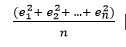

####     [each error squared and divided by number of data points]

##### This is known as the mean squared error

Here e1, e2 …. , en are the difference between the actual and the predicted values.

So, in our first model what would be the mean squared error? On predicting the mean for all the data points, we get a mean squared error = 29,11,799. Looks like huge error. May be its not so cool to simply predict the average value.

Let’s see if we can think of something to reduce the error. Here is a live coding window to predict target using mean.

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import sys
from decimal import Decimal

In [2]:
train_data = pd.read_csv('C:/Users/sunil/Learning/Comprehensive Learning path for NLP/002-Linear Regression/Case Study - Practice Problem - Big Mart Sales III/Data/train_orig.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Mean,Diff,SqofDiff,WholeMean,Diffbetsalesandwholemean,Sqofdiffwithwholemean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,5198.067050,-1462.929050,2.140161e+06,2181.288914,1553.849086,2.414447e+06
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,862.211000,-418.788200,1.753836e+05,2181.288914,-1737.866114,3.020179e+06
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,1478.076000,619.194000,3.834012e+05,2181.288914,-84.018914,7.059178e+03
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,3021.067500,-2288.687500,5.238090e+06,2181.288914,-1448.908914,2.099337e+06
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,653.926567,340.778633,1.161301e+05,2181.288914,-1186.583714,1.407981e+06


In [4]:
test_data = pd.read_csv('C:/Users/sunil/Learning/Comprehensive Learning path for NLP/002-Linear Regression/Case Study - Practice Problem - Big Mart Sales III/Data/test_orig.csv')

In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# print shape of training data and test data
print('shape of training data :',train_data.shape)
print('shape of test data :',test_data.shape)

shape of training data : (8526, 18)
shape of test data : (5681, 11)


In [7]:
# marking the predict field in both the data sets
train_y = train_data['Item_Outlet_Sales']


In [8]:
train_y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [9]:
import numpy as np
test_data['Item_Outlet_Sales'] = np.nan

In [10]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [11]:
# sort train_data by Item_identifier
train_data_sorted = train_data.sort_values('Outlet_Location_Type', axis = 0)
print(train_data_sorted[0:20])

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
4073           FDG05       11.000          Regular         0.000000   
4082           FDZ47       20.700          Regular         0.079296   
4085           FDY04       17.700          Regular         0.042542   
4087           FDE28        9.500          Regular         0.000000   
4098           FDB27        7.575          Low Fat         0.055476   
4101           FDU38          NaN               LF         0.144534   
4104           FDS15        9.195          Regular         0.078061   
4106           DRP47       15.750          Low Fat         0.140822   
4108           FDA19          NaN          Low Fat         0.000000   
4122           NCS30        5.945          Low Fat         0.093171   
4125           FDC11       20.500               LF         0.141793   
4131           FDC40       16.000          Regular         0.065165   
4136  

In [12]:
train_data_sortedandgrouped = train_data_sorted.groupby(['Outlet_Location_Type']).mean()

In [13]:
train_data_sortedandgrouped

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Mean,Diff,SqofDiff,WholeMean,Diffbetsalesandwholemean,Sqofdiffwithwholemean
Outlet_Location_Type,,,,,,,,,,,
Tier 1,12.892124,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
Tier 2,12.768628,0.061038,141.167196,2004.330341,2323.990559,2194.051101,129.939458,1.049865e+06,2181.288914,142.701645,2.331586e+06
Tier 3,12.933745,0.066751,140.935232,1994.358507,2279.627651,2191.818989,87.808662,2.238977e+06,2181.288914,98.338737,3.666049e+06


In [14]:
train_data_withmean = pd.merge(train_data,train_data_sortedandgrouped,left_on = 'Outlet_Location_Type',right_on = 'Outlet_Location_Type',how = 'inner')

In [15]:
train_data_withmean

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility_x,Item_Type,Item_MRP_x,Outlet_Identifier,Outlet_Establishment_Year_x,Outlet_Size,Outlet_Location_Type,...,Item_Visibility_y,Item_MRP_y,Outlet_Establishment_Year_y,Item_Outlet_Sales_y,Mean_y,Diff_y,SqofDiff_y,WholeMean_y,Diffbetsalesandwholemean_y,Sqofdiffwithwholemean_y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,...,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
1,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,...,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
2,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999.0,Medium,Tier 1,...,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
3,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997.0,Small,Tier 1,...,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
4,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999.0,Medium,Tier 1,...,0.071205,140.870106,1995.125628,1876.909159,2151.632948,-274.723789,1.589150e+06,2181.288914,-304.379755,2.530374e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004.0,Small,Tier 2,...,0.061038,141.167196,2004.330341,2323.990559,2194.051101,129.939458,1.049865e+06,2181.288914,142.701645,2.331586e+06
8519,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004.0,Small,Tier 2,...,0.061038,141.167196,2004.330341,2323.990559,2194.051101,129.939458,1.049865e+06,2181.288914,142.701645,2.331586e+06
8520,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002.0,NaN,Tier 2,...,0.061038,141.167196,2004.330341,2323.990559,2194.051101,129.939458,1.049865e+06,2181.288914,142.701645,2.331586e+06
8521,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,...,0.061038,141.167196,2004.330341,2323.990559,2194.051101,129.939458,1.049865e+06,2181.288914,142.701645,2.331586e+06


In [16]:
train_data_withmean = train_data_withmean[['Item_Identifier','Item_Weight_x','Item_Fat_Content','Item_Visibility_x','Item_Type','Item_MRP_x','Outlet_Identifier','Outlet_Establishment_Year_x','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales_x','Item_Outlet_Sales_y']]

In [17]:
train_data_withmean.loc[:,'diffbetwyandmean'] =0

C:\Users\sunil\anaconda3\envs\NLP\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sunil\anaconda3\envs\NLP\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
train_data_withmean.head()

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility_x,Item_Type,Item_MRP_x,Outlet_Identifier,Outlet_Establishment_Year_x,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_x,Item_Outlet_Sales_y,diffbetwyandmean
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,1876.909159,0
1,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,1876.909159,0
2,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1516.0266,1876.909159,0
3,FDA03,18.5,Regular,0.045464,Dairy,144.1102,OUT046,1997.0,Small,Tier 1,Supermarket Type1,2187.1530,1876.909159,0
4,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1589.2646,1876.909159,0


In [21]:
def getdiffyandybar(x):
    yminusybar = Decimal((x.Item_Outlet_Sales_x - x.Item_Outlet_Sales_y) ** 2)
    #print(x)
    return round(yminusybar,2)

In [22]:
train_data_withmean['diffbetwyandmean'] = train_data_withmean.apply(lambda x: getdiffyandybar(x),axis=1)

C:\Users\sunil\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train_data_withmean

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility_x,Item_Type,Item_MRP_x,Outlet_Identifier,Outlet_Establishment_Year_x,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales_x,Item_Outlet_Sales_y,diffbetwyandmean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,1876.909159,3453014.43
1,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,1876.909159,48558.90
2,FDY07,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1516.0266,1876.909159,130236.22
3,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997.0,Small,Tier 1,Supermarket Type1,2187.1530,1876.909159,96251.24
4,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,1589.2646,1876.909159,82739.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004.0,Small,Tier 2,Supermarket Type1,7182.6504,2323.990559,23606575.45
8519,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004.0,Small,Tier 2,Supermarket Type1,595.2252,2323.990559,2988629.67
8520,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,468.7232,2323.990559,3442016.97
8521,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,549.2850,2323.990559,3149579.82


In [25]:
print("MSE with mean from location type",train_data_withmean['diffbetwyandmean'].sum() / train_data_withmean.shape[0])

MSE with mean from location type 2875385.977791857327232195236


In [ ]:
#train_data_withmean.shape[0]

In [ ]:
#train_data_sortedandgrouped.to_csv(r'C:/Users/sunil/Learning/Comprehensive Learning path for NLP/002-Linear Regression/Case Study - Practice Problem - Big Mart Sales III/Data/TrainDatawithMean.csv')